# Activity: Perform multiple linear regression

multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables.
will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.

In [1]:
import pandas as pd
import numpy as np
import os 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
file_name = 'marketing_sales_data.csv'
file_path = os.path.join(cwd,'raw_data',file_name)
mktg_raw_data = pd.read_csv(file_path)

mktg_raw_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


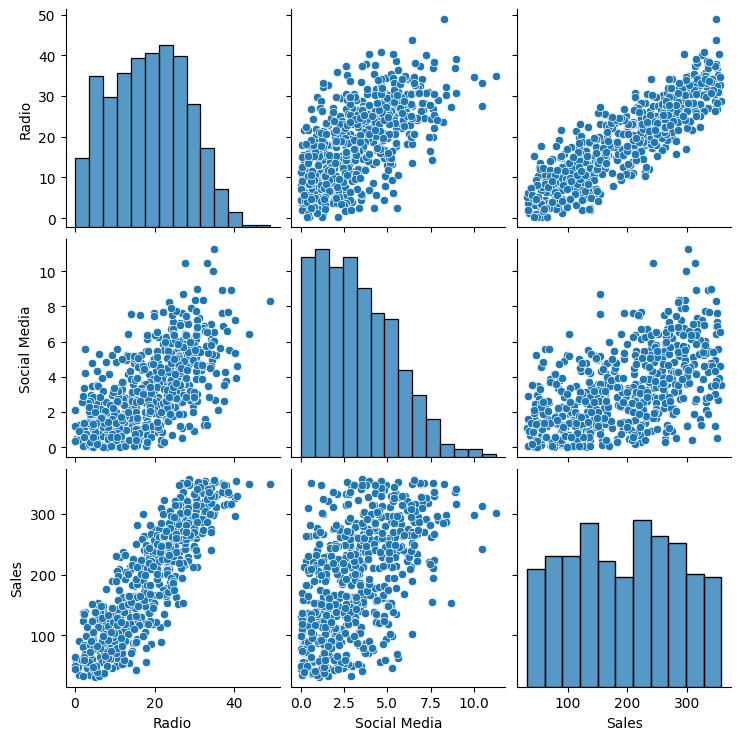

In [3]:
sns.pairplot(
    data = mktg_raw_data
)

In [4]:
# Get the mean sales for the categorical Data

mktg_raw_data[['TV', 'Sales']].groupby('TV').mean('Sales').reset_index()

,TV,Sales
0,High,300.529591
1,Low,91.646843
2,Medium,199.023461


In [5]:
mktg_raw_data[['Influencer', 'Sales']].groupby('Influencer').mean('Sales').reset_index()

,Influencer,Sales
0,Macro,205.660047
1,Mega,180.385096
2,Micro,198.655080
3,Nano,190.777766


***
## check and remove missing data

In [6]:
# check the shape of the dataframe

mktg_raw_data.shape

(572, 5)

In [7]:
mktg_raw_data.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [8]:
mask_na = mktg_raw_data.isna()
mask_na = mask_na.any(axis=1)

mktg_raw_data[mask_na]

,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


In [9]:
# since there are only 3 rows, I will drop those rows

mktg = mktg_raw_data.dropna()
mktg.shape

(569, 5)

In [10]:
# renaming social media columns

mktg = mktg.rename(columns={'Social Media': 'Social_Media'})

***
## Fit a multinear model to the data 

In [11]:
# Check if a model Social Media & Influencer vs a model TV & Radio have a higher impact in the Sales
# Both models have a categorical independent variable

# Create the model on function of the Social Media & Influencer
sm_infl_model = ols(formula = 'Sales ~ C(Influencer) + Social_Media', data = mktg).fit()

# Create a model in function of the TV & Radio
tv_rad_model = ols(data = mktg, formula = 'Sales ~ C(TV) + Radio').fit()

In [12]:
# Check the info form the Social Media & Influencer model
sm_infl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     56.85
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           2.66e-40
Time:                        00:56:37   Log-Likelihood:                -3273.0
No. Observations:                 569   AIC:                             6556.
Df Residuals:                     564   BIC:                             6578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                131.1403      8.436     15.546      0.000     114.571     147.710
C(Influencer)[T.Mega]    -16.5921      9.236     -1.796      0.073     -34.734       1.550
C(Influencer)[T.Micro]    -4.6133      9.246     -0.499      0.618     -22.773      13.547
C(Influencer)[T.Nano]     -9.1415      9.228     -0.991      0.322     -27.267       8.984
Social_Media              21.6464      1.465     14.773      0.000      18.768      24.524
==============================================================================
Omnibus:                       12.736   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.509
Skew:                           0.092   Prob(JB):                       0.0234
Kurtosis:                       2.468   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f(sales) = 21.6464*Social_media + (Mega [0/1])*(-16.5921) + (Micro[0/1])*(-4.6133) + (Nano[0/1])*(-9.1415) + 131.1403

In [13]:
# Check the model from Tv and Radio

tv_rad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 19 Jan 2026   Prob (F-statistic):          1.61e-287
Time:                        00:56:37   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f(sales) = 2.8864*radio + (low[0/1])*(-152.0897) + (medium[0/1])*(-73.48.35) + 217.6367

<Axes: xlabel='TV', ylabel='Sales'>

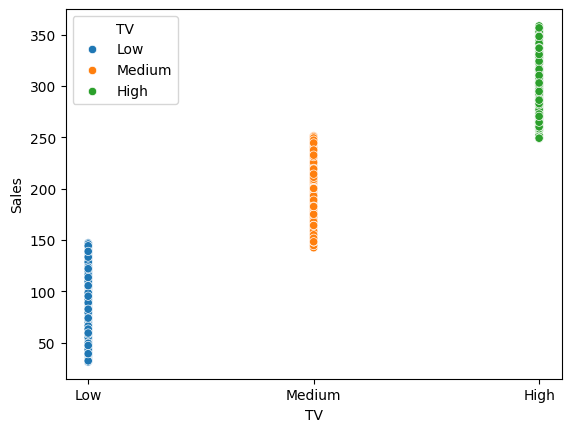

In [14]:
sns.scatterplot(
    data=mktg[['TV','Sales']],
    x = 'TV',
    y = 'Sales',
    hue= 'TV'
)

<Axes: xlabel='Influencer', ylabel='Sales'>

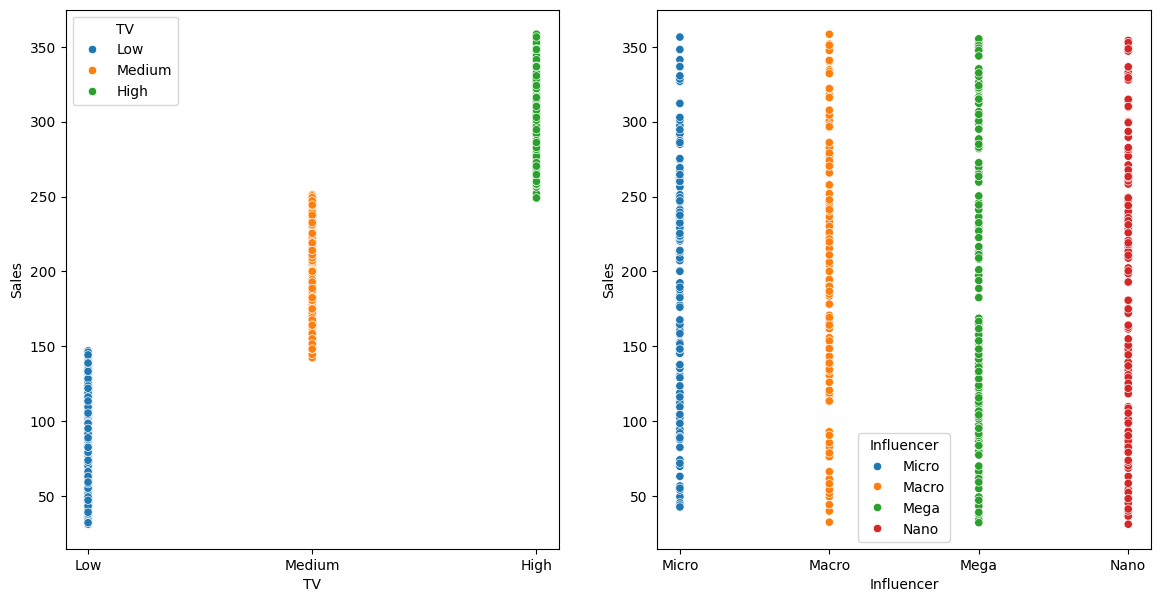

In [15]:
fig, axes = plt.subplots(1,2,figsize=(14,7))

sns.scatterplot(
    data = mktg,
    x = 'TV',
    y = 'Sales',
    hue = 'TV',
    ax= axes[0]
)

sns.scatterplot(
    data=mktg,
    x = 'Influencer',
    y = 'Sales',
    hue = 'Influencer',
    ax= axes[1],
    color = 'coral'
)


***
## Check model Assumptions
### 1. Linearity

<Axes: xlabel='Social_Media', ylabel='Sales'>

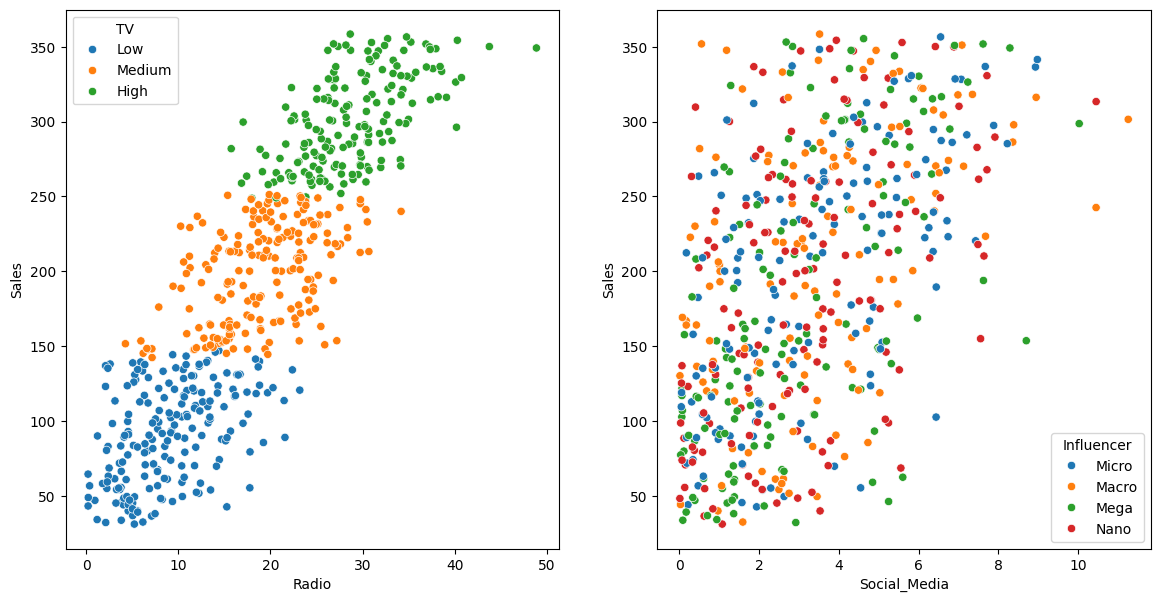

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14,7))

sns.scatterplot(
    data = mktg,
    x = 'Radio',
    y = 'Sales',
    hue = 'TV',
    ax= axes[0]
)

sns.scatterplot(
    data=mktg,
    x = 'Social_Media',
    y = 'Sales',
    hue = 'Influencer',
    ax= axes[1],
)


<Axes: xlabel='Social_Media', ylabel='Sales'>

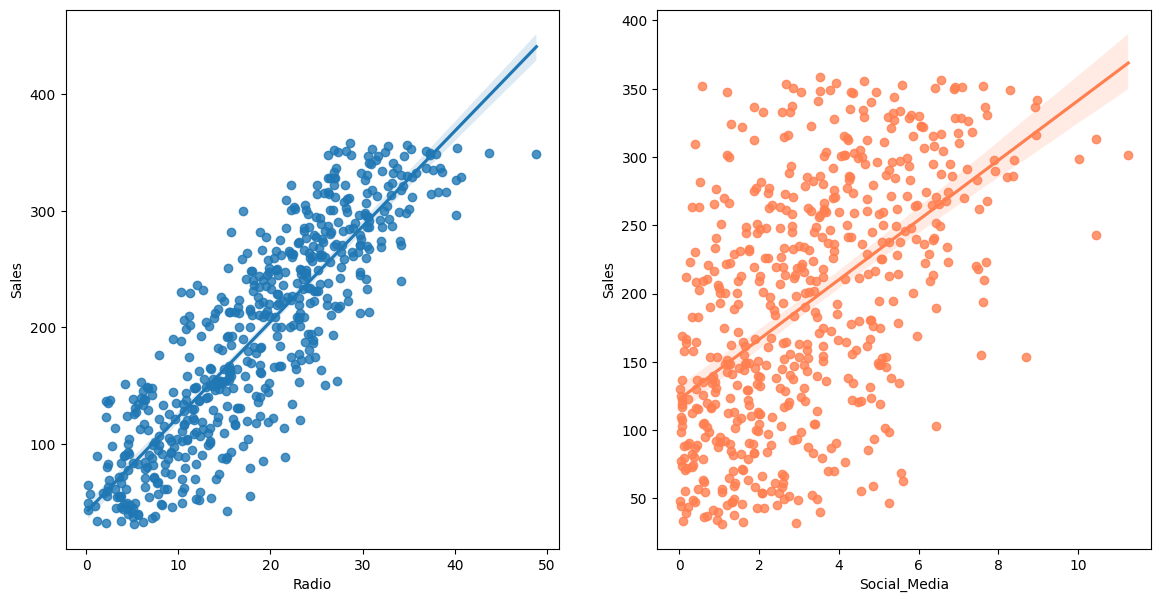

In [17]:
fig, axes = plt.subplots(1,2,figsize=(14,7))

sns.regplot(
    data = mktg,
    x = 'Radio',
    y = 'Sales',
    ax= axes[0]
)

sns.regplot(
    data=mktg,
    x = 'Social_Media',
    y = 'Sales',
    ax= axes[1],
    color = 'coral'
)


### 2. Normality

In [18]:
# First I will need to calculate de residuals 
# The residuals are the difference between the predicted and the observed values 

# If I want to calculate the residuals by hand

def handy_predictions(row):
    ''' This equation will calculate the predition values 
    for sales if the independent variables are
    TV which is categorical and radio which is continues
    from the model summary the equation of sales is: 

    f(sales) = 2.8864*radio + (low[0/1])*(-152.0897) + (medium[0/1])*(-73.48.35) + 217.6367
    '''
    # set the coeficients for the equation
    if row['TV'] == 'High':
        low = 0
        medium = 0
    elif row['TV'] == 'Medium':
        low = 0
        medium = 1
    else:
        low = 1
        medium = 0

    # get the prediction value based on the model equation
    sales = 2.8864*row['Radio']  + ((low)*(-152.0897)) + ((medium)*(-73.4835)) + 217.6367
    return sales

In [19]:
mktg_hand_predictions = mktg

mktg_hand_predictions['Predictions'] = mktg_hand_predictions[['Radio','TV']].apply(handy_predictions,axis=1)
mktg_hand_predictions['Residuals'] = mktg_hand_predictions['Predictions'] - mktg_hand_predictions['Sales']

mktg_hand_predictions['Residuals'].mean()

np.float64(0.0007032646615988978)

<Axes: xlabel='Residuals', ylabel='Count'>

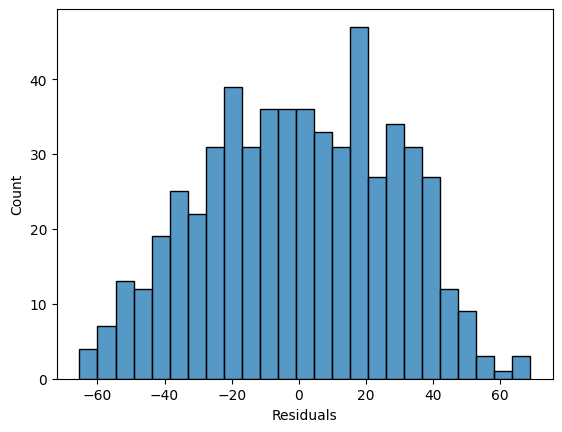

In [20]:
sns.histplot(
    data = mktg_hand_predictions,
    x = 'Residuals',
    bins = 25
)

In [21]:
# all of those steps where unneccesary to do since 
# ols has already a way to get the predictions and the residuals


mktg['Predictions'] = tv_rad_model.predict(mktg[['Radio','TV']])
mktg['Residuals'] = tv_rad_model.resid

mktg.head()

,TV,Radio,Social_Media,Influencer,Sales,Predictions,Residuals
0,Low,1.218354,1.270444,Micro,90.054222,69.063601,20.990621
1,Medium,14.949791,0.274451,Macro,222.741668,187.303706,35.437962
2,Low,10.377258,0.061984,Mega,102.774790,95.499521,7.275269
3,High,26.469274,7.070945,Micro,328.239378,294.036617,34.202761
4,High,36.876302,7.618605,Mega,351.807328,324.075075,27.732253


Text(0.5, 1.0, 'Residuals from python calculations')

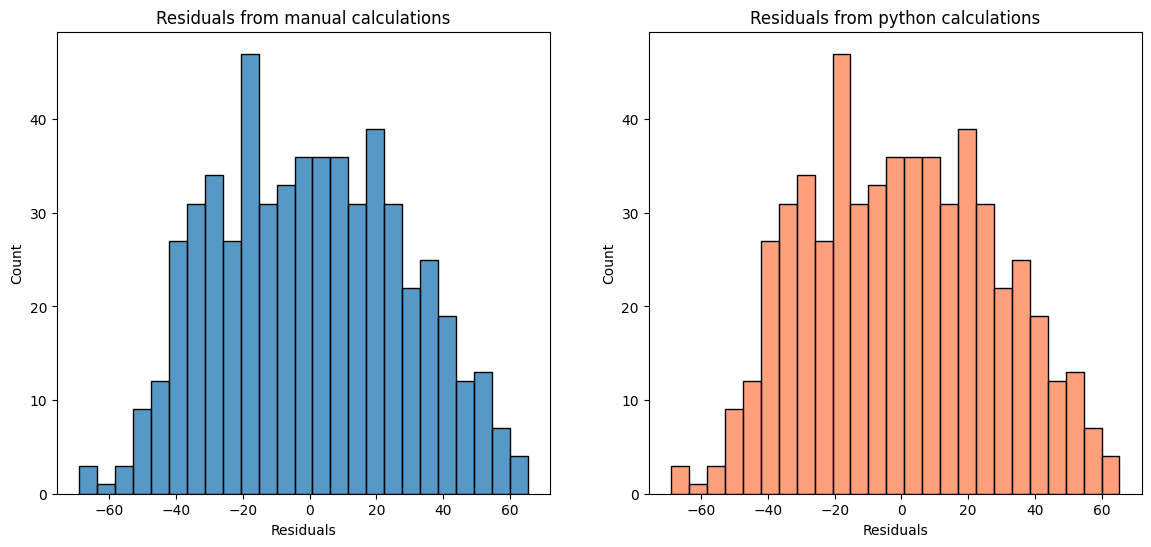

In [22]:
fig, axes = plt.subplots(1,2,figsize= (14,6))

sns.histplot(
    data = mktg_hand_predictions,
    x = 'Residuals',
    bins = 25,
    ax= axes[0]
)

sns.histplot(
    data = mktg,
    x = 'Residuals',
    bins = 25,
    ax= axes[1],
    color = 'coral'
)

axes[0].set_title('Residuals from manual calculations')
axes[1].set_title('Residuals from python calculations')

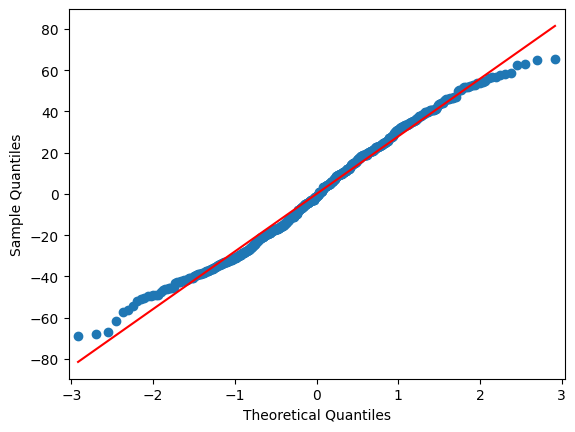

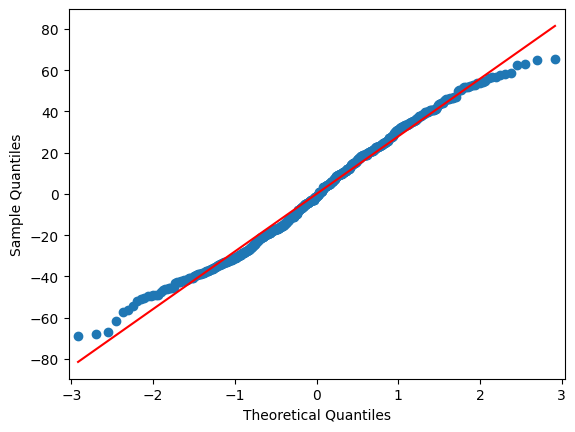

In [24]:
sm.qqplot(
    data = mktg['Residuals'],
    line = 's'
)

### 3. Constant Variance

<Axes: xlabel='Predictions', ylabel='Residuals'>

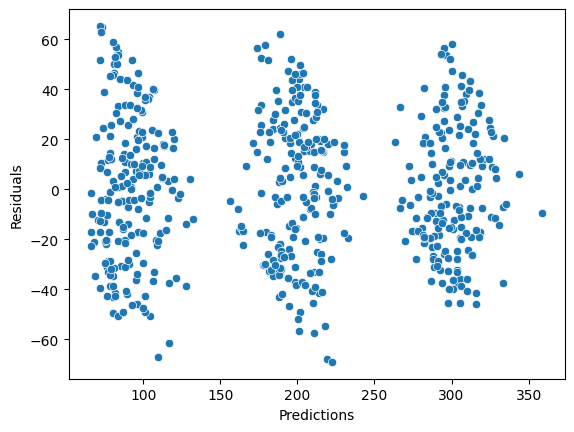

In [25]:
sns.scatterplot(x = mktg['Predictions'], y = mktg['Residuals'])